In [1]:
import os
#if not os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
#    raise 'stop'
if not os.path.isdir('d:/flagellar/'):
    deps_path = '/kaggle/usr/lib/flg_packages/'
    !pip install --no-index --find-links {deps_path} --requirement {deps_path}/requirements.txt

In [2]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/kaggle/code/core')
sys.path.append('/kaggle/input/my-flagellar-library/')
import flg_support as fls
import flg_model

In [3]:
model = flg_model.ThreeStepModel()
model.step1Heatmap = fls.dill_load(fls.model_dir + 'model_cv.pickle')
#model.TEMP_threshold = 40.
model.train(fls.load_all_train_data()) # dummy

In [4]:
test_data = fls.load_all_test_data()
if len(test_data)>3:
    test_data = test_data[:100]

Clearing cupy
torch.Size([500, 1912, 1847])
Empty DataFrame
Columns: [z, y, x, size, max_logit]
Index: []
Clearing pytorch
Clearing cupy
torch.Size([300, 959, 928])
     z    y    x    size  max_logit
3  165  542  602  114828   39.46875
Clearing pytorch
Clearing cupy
torch.Size([300, 960, 928])
     z    y    x    size  max_logit
9  140  633  289  131503    55.0625
CPU times: total: 38.6 s
Wall time: 1min 6s


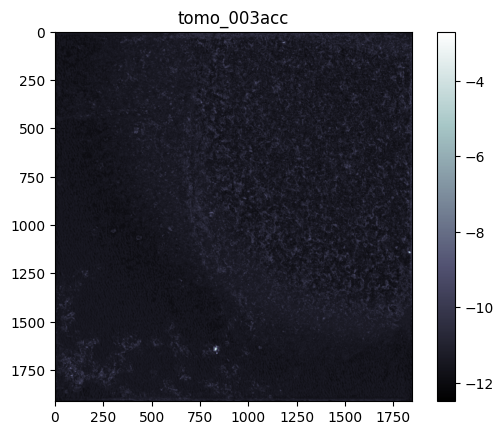

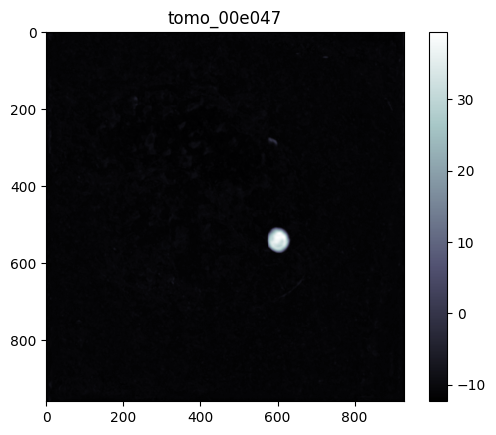

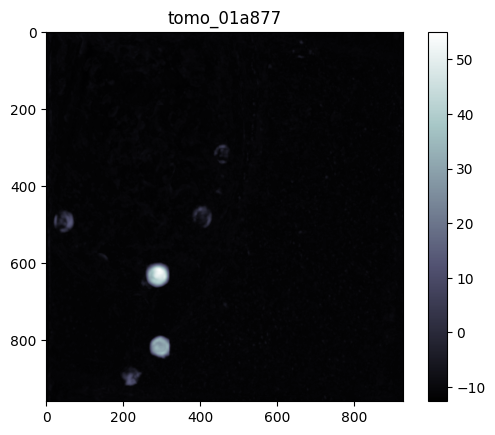

In [5]:
%%time
inferred_data = model.infer(test_data)

In [6]:
fls.write_submission_file(inferred_data)

       tomo_id  Motor axis 0  Motor axis 1  Motor axis 2
0  tomo_003acc            -1            -1            -1
1  tomo_00e047           165           542           602
2  tomo_01a877           140           633           289
